In [1]:
!pip install requests
!pip install opencv-python
!pip install numpy


📡 Conectando a: https://juannmontoya-billar-detector-v1.hf.space/predict

✅ ¡ÉXITO! Respuesta del servidor:
{
  "filename": "local.jpg",
  "detections": [
    {
      "label": "13",
      "confidence": 0.94,
      "bbox": [
        0,
        578,
        270,
        886
      ],
      "type": "ball"
    },
    {
      "label": "15",
      "confidence": 0.93,
      "bbox": [
        660,
        756,
        1040,
        1165
      ],
      "type": "ball"
    },
    {
      "label": "5",
      "confidence": 0.93,
      "bbox": [
        932,
        631,
        1218,
        916
      ],
      "type": "ball"
    },
    {
      "label": "1",
      "confidence": 0.92,
      "bbox": [
        1225,
        592,
        1526,
        865
      ],
      "type": "ball"
    },
    {
      "label": "9",
      "confidence": 0.92,
      "bbox": [
        479,
        549,
        744,
        809
      ],
      "type": "ball"
    },
    {
      "label": "14",
      "confidence": 0.92,
      "

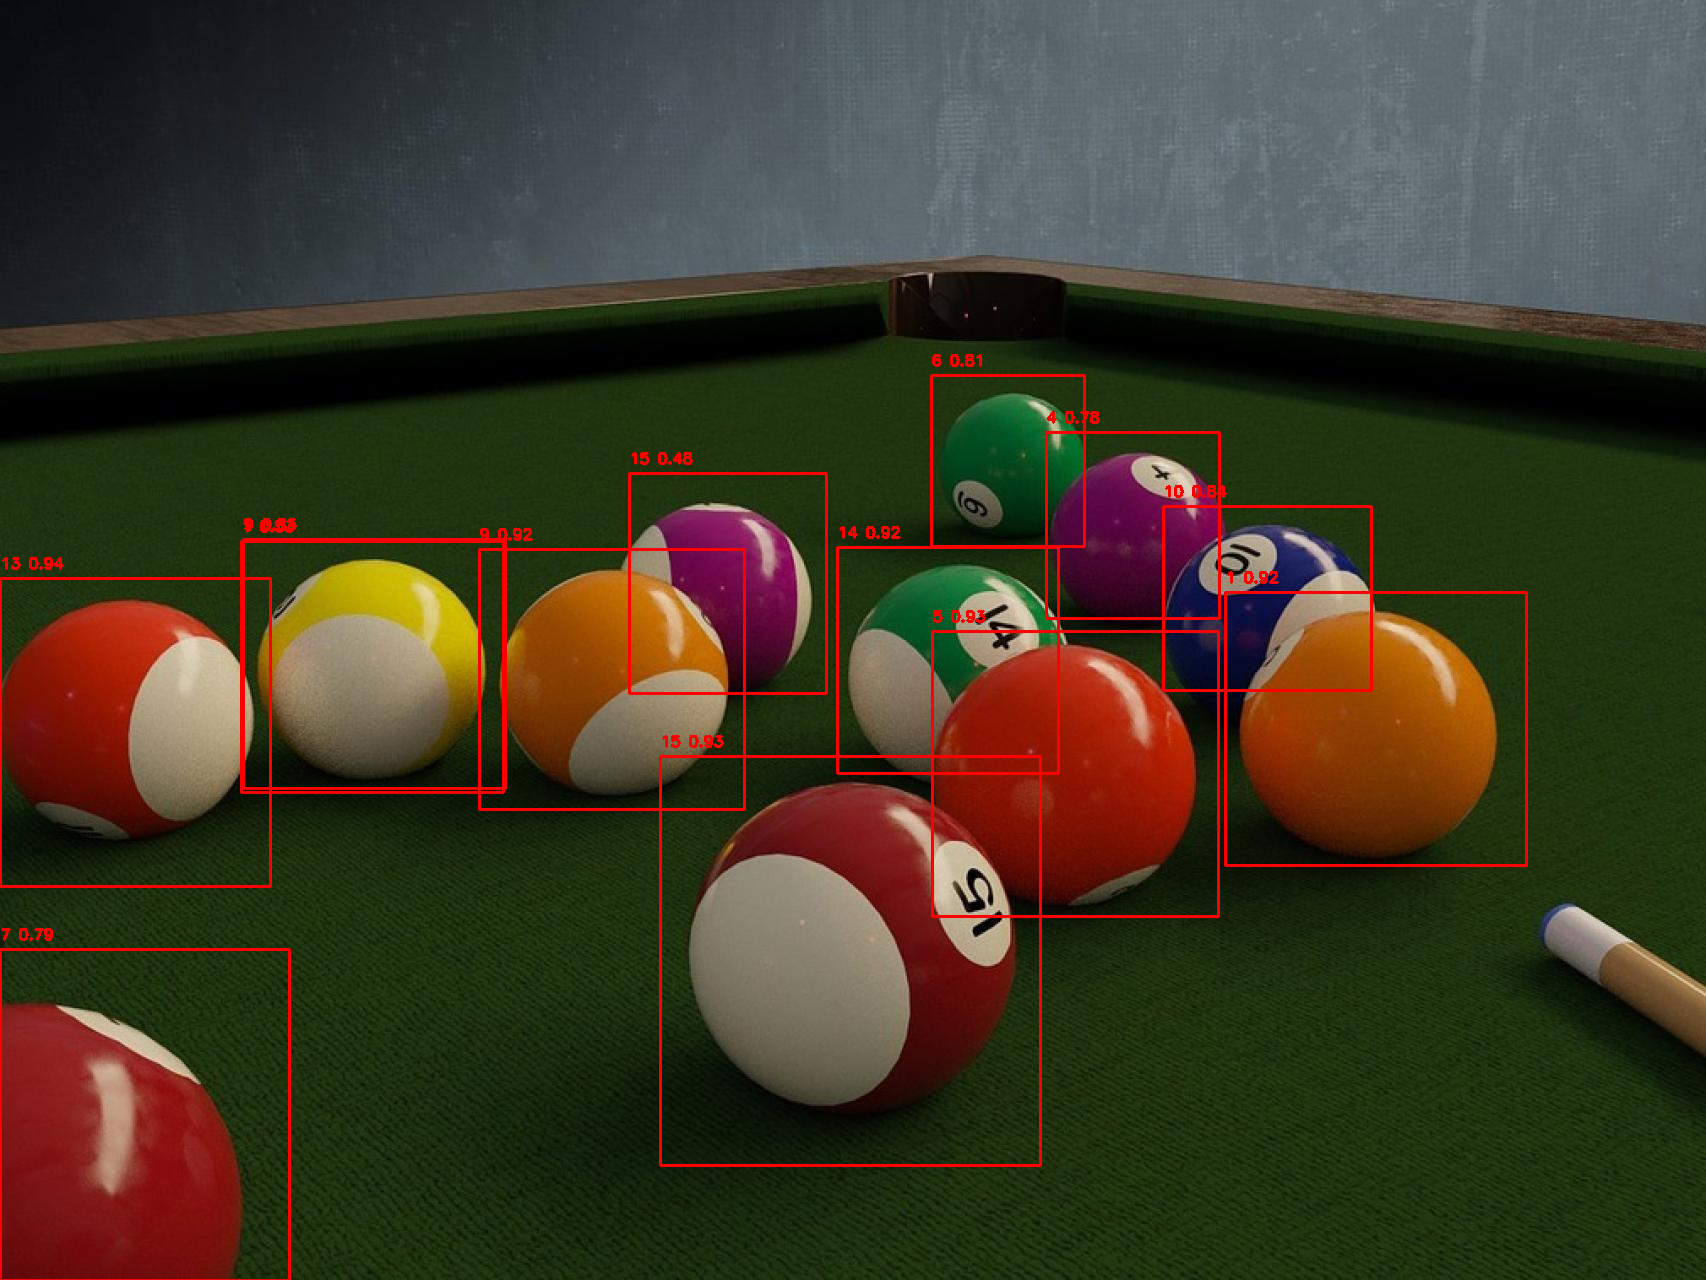

In [2]:
import requests
import json
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Para mostrar imágenes en Colab

# ============================================
# CONFIGURACIÓN
# ============================================
API_URL = "https://juannmontoya-billar-detector-v1.hf.space/predict"

# Ruta de la imagen en Colab
IMAGE_PATH = "/content/local.jpg"  # Asegúrate de subir tu imagen a esta ruta

print(f"📡 Conectando a: {API_URL}")

try:
    with open(IMAGE_PATH, "rb") as f:
        # Enviamos la imagen como un archivo form-data
        response = requests.post(API_URL, files={"file": f})

    if response.status_code == 200:
        data = response.json()
        print("\n✅ ¡ÉXITO! Respuesta del servidor:")
        print(json.dumps(data, indent=2))

        # --- OPCIONAL: DIBUJAR RESULTADO EN LOCAL ---
        print("\n🎨 Dibujando resultado...")
        img = cv2.imread(IMAGE_PATH)

        for det in data.get('detections', []):
            label = det['label']
            box = det['bbox']
            conf = det['confidence']
            tipo = det['type']

            x1, y1, x2, y2 = map(int, box)
            color = (0, 255, 0) if tipo == "zone" else (0, 0, 255)

            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, f"{label} {conf:.2f}", (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Mostrar imagen en Colab
        cv2_imshow(img)

    else:
        print(f"❌ Error {response.status_code}: {response.text}")

except Exception as e:
    print(f"❌ Error de conexión: {e}")
    print("Consejo: Verifica que el Space esté 'Running' y que la URL sea la correcta (.hf.space)")
